In [ ]:
#import library
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# loading dataset
from google.colab import files
df = files.upload()
df = pd.read_csv("/content/emails.csv")

In [ ]:
df.shape

(5695, 2)

In [ ]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,spam
1,Subject: the stock trading gunslinger fanny i...,spam
2,Subject: unbelievable new homes made easy im ...,spam
3,Subject: 4 color printing special request add...,spam
4,"Subject: do not have money , get software cds ...",spam


In [ ]:
# names of cols
df.columns

Index(['text', 'spam'], dtype='object')

In [ ]:
# remove duplicate
df.drop_duplicates(inplace=True)
print(df.shape)# احذف القيمه المكرره

(5695, 2)


In [ ]:
print(df.isnull().sum())

text    0
spam    0
dtype: int64


In [ ]:
# download the stopwords package
nltk.download("stopwords")# تحليل النصوص في البييانات

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def process(text):
    nopunc = [char for char in text if char not in string.punctuation] # يتخلص من علامات التنصيص زي الفاصله والخ
    nopunc = ''.join(nopunc)

    clean = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')] # يفصل كل كلمه عن كلمه \ ويخلي كل الحروف سمول ويشيل كلمات التوقف زي the \ is
    return clean
# to show the tokenization
df['text'].head().apply(process)

,text
0,"[Subject, naturally, irresistible, corporate, ..."
1,"[Subject, stock, trading, gunslinger, fanny, m..."
2,"[Subject, unbelievable, new, homes, made, easy..."
3,"[Subject, 4, color, printing, special, request..."
4,"[Subject, money, get, software, cds, software,..."


In [ ]:
# Replace 1 with 'spam' and 0 with 'not spam' in the 'spam' column
df['spam'] = df['spam'].replace({1: 'spam', 0: 'not spam'}) # يحول كلمه سبام الى واحد ونت سبام الى زيرو
# Display the updated DataFrame
print(df)


                                                   text      spam
0     Subject: naturally irresistible your corporate...      spam
1     Subject: the stock trading gunslinger  fanny i...      spam
2     Subject: unbelievable new homes made easy  im ...      spam
3     Subject: 4 color printing special  request add...      spam
4     Subject: do not have money , get software cds ...      spam
...                                                 ...       ...
5723  Subject: re : research and development charges...  not spam
5724  Subject: re : receipts from visit  jim ,  than...  not spam
5725  Subject: re : enron case study update  wow ! a...  not spam
5726  Subject: re : interest  david ,  please , call...  not spam
5727  Subject: news : aurora 5 . 2 update  aurora ve...  not spam

[5695 rows x 2 columns]


<Axes: >

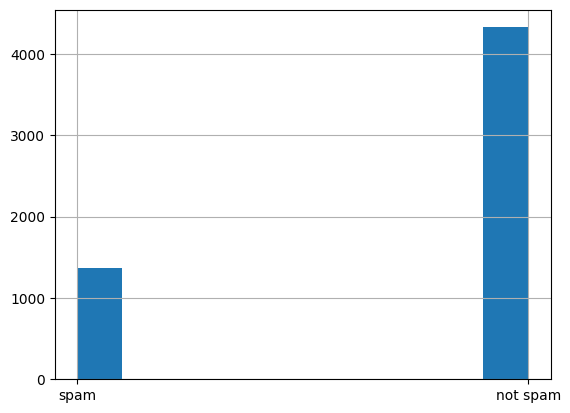

In [ ]:
df['spam'].hist()

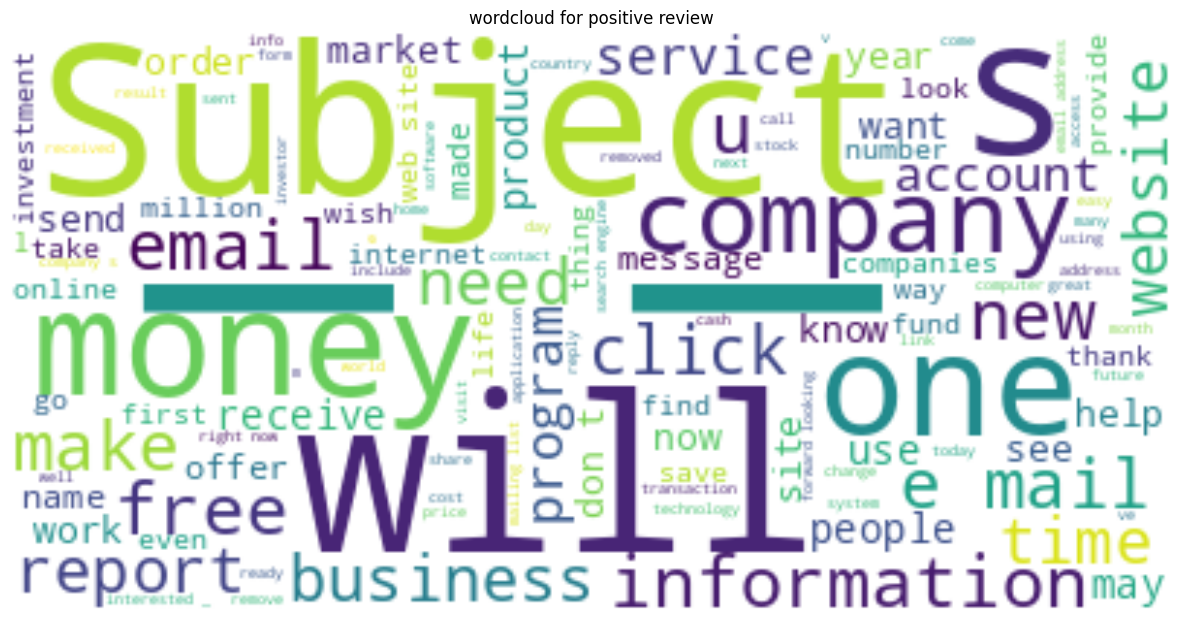

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(i for i in df[df['spam']=='spam']['text'])
wordcloud = WordCloud( background_color="white").generate(text)

plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('wordcloud for positive review')
plt.show()

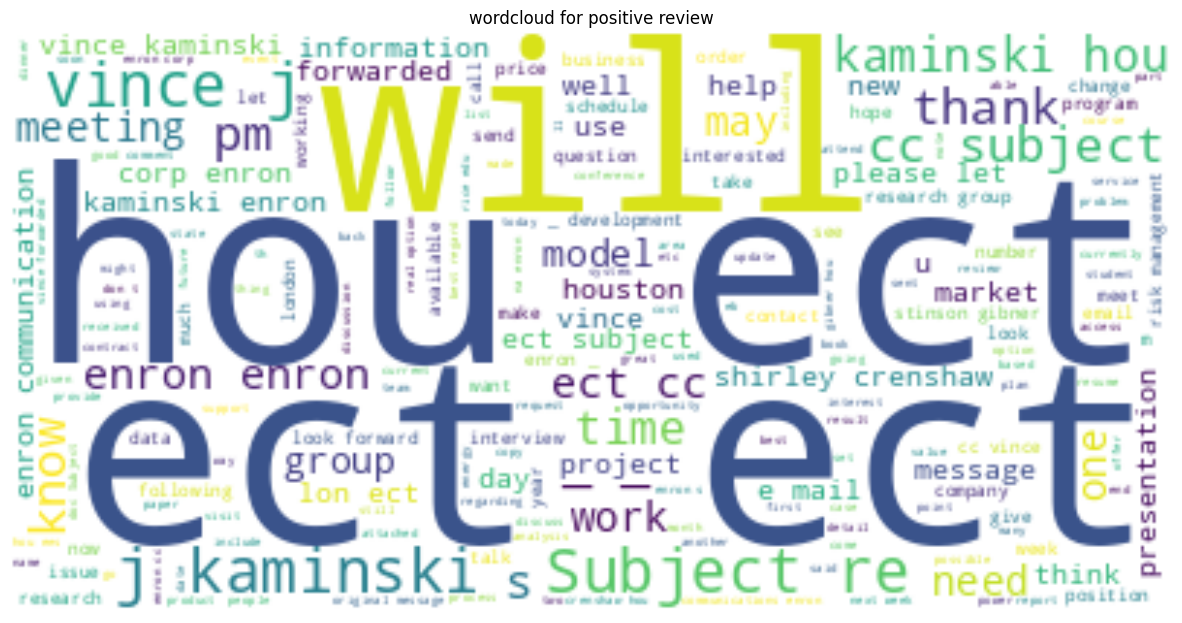

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(i for i in df[df['spam']=='not spam']['text'])
wordcloud = WordCloud( background_color="white").generate(text)

plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('wordcloud for positive review')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer # احول الكلمات الى ارقام عشان اطبق المودل
cv = CountVectorizer(analyzer=process)
x = cv.fit_transform(df['text']).toarray()
x
#

#from sklearn.feature_extraction.text import TfidVectorizer
#Tf = TfidVectorizer(analyzer=process)
# x = Tf.fit_transform(df['text']).toarray()
# x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, df['spam'], test_size=0.20, random_state=0)
# To see the shape of the data
print(x.shape)

(5695, 37229)


In [ ]:
# create and train the Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(xtrain, ytrain)

In [ ]:
print(classifier.predict(xtrain))
print(ytrain.values)# اتنبا بالترين

['not spam' 'not spam' 'not spam' ... 'not spam' 'not spam' 'not spam']
['not spam' 'not spam' 'not spam' ... 'not spam' 'not spam' 'not spam']


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = classifier.predict(xtrain)
print(classification_report(ytrain, pred))
print()
print("Confusion Matrix: \n", confusion_matrix(ytrain, pred))
print("Accuracy: \n", accuracy_score(ytrain, pred)) # الاوفر فيتنق لو كان الترين اكبر من التيست ، والاندرفيتنق العكس

              precision    recall  f1-score   support

    not spam       1.00      1.00      1.00      3457
        spam       0.99      1.00      0.99      1099

    accuracy                           1.00      4556
   macro avg       0.99      1.00      1.00      4556
weighted avg       1.00      1.00      1.00      4556


Confusion Matrix: 
 [[3445   12]
 [   1 1098]]
Accuracy: 
 0.9971466198419666


In [ ]:
#print the predictions
print(classifier.predict(xtest))
#print the actual values
print(ytest.values)

['spam' 'not spam' 'not spam' ... 'not spam' 'not spam' 'not spam']
['spam' 'not spam' 'not spam' ... 'not spam' 'not spam' 'not spam']


In [ ]:
# Evaluating the model on the training data set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = classifier.predict(xtest)
print(classification_report(ytest, pred))
print()
print("Confusion Matrix: \n", confusion_matrix(ytest, pred))
print("Accuracy: \n", accuracy_score(ytest, pred))

              precision    recall  f1-score   support

    not spam       1.00      0.99      0.99       870
        spam       0.97      1.00      0.98       269

    accuracy                           0.99      1139
   macro avg       0.98      0.99      0.99      1139
weighted avg       0.99      0.99      0.99      1139


Confusion Matrix: 
 [[862   8]
 [  1 268]]
Accuracy: 
 0.9920983318700615


In [ ]:
#import logisticRegression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = model.predict(xtrain)
print(classification_report(ytrain, pred))
print()
print("Confusion Matrix: \n", confusion_matrix(ytrain, pred))
print("Accuracy: \n", accuracy_score(ytrain, pred)*100)

              precision    recall  f1-score   support

    not spam       1.00      1.00      1.00      3457
        spam       1.00      1.00      1.00      1099

    accuracy                           1.00      4556
   macro avg       1.00      1.00      1.00      4556
weighted avg       1.00      1.00      1.00      4556


Confusion Matrix: 
 [[3457    0]
 [   0 1099]]
Accuracy: 
 100.0


In [ ]:
# Evaluating the model on the training data set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = model.predict(xtest)
print(classification_report(ytest, pred))
print()
print("Confusion Matrix: \n", confusion_matrix(ytest, pred))
print("Accuracy: \n", accuracy_score(ytest, pred)*100)

              precision    recall  f1-score   support

    not spam       0.99      0.99      0.99       870
        spam       0.98      0.96      0.97       269

    accuracy                           0.99      1139
   macro avg       0.98      0.98      0.98      1139
weighted avg       0.99      0.99      0.99      1139


Confusion Matrix: 
 [[865   5]
 [ 10 259]]
Accuracy: 
 98.68305531167691


In [ ]:
# predict model
input_your_email = ['from www.Applausestore.com MonthlySubscription@50p/msg max6/month T&CsC web age16 2stop txt stop']
input_data = cv.transform(input_your_email)
prediction = classifier.predict(input_data)
if(prediction[0]==1):
    print("ham")
else:
    print('spam')

spam


In [ ]:
feature_names = cv.get_feature_names_out()

feature_to_coef = {word: coef for word, coef in zip(feature_names, model.coef_[0])}


In [ ]:
for best_positive in sorted(feature_to_coef.items(),key=lambda x: x[1],reverse=True)[:20]:
    print (best_positive)# اطبع لي الكلمات الايجابيه ونسبة ايجابيتها

('software', 1.1566357287631983)
('click', 1.092376921772732)
('http', 0.9388695467518261)
('viagra', 0.922703043229376)
('life', 0.8361132889326574)
('online', 0.8287660660408357)
('sex', 0.7780070454737912)
('love', 0.6970134081438731)
('account', 0.6785403747353772)
('free', 0.6319588209890473)
('delivery', 0.6129462849333185)
('man', 0.6124336387455807)
('money', 0.5983876614919869)
('save', 0.5880704368519798)
('mail', 0.5878737946480548)
('penis', 0.5809863446173195)
('area', 0.5720949878707774)
('prescription', 0.5432031588161143)
('site', 0.5379759176527005)
('get', 0.5377261746728028)


In [ ]:
for best_negative in sorted(feature_to_coef.items(),key=lambda x: x[1])[:20]:
    print (best_negative)

('vince', -2.4219543378062562)
('thanks', -1.4555558182787551)
('enron', -1.3713936735623529)
('research', -1.0275839386832522)
('password', -0.893360934511669)
('congratulations', -0.8796329975963633)
('attached', -0.8048551848036174)
('2000', -0.7901259183997609)
('model', -0.7777108638098774)
('stinson', -0.7531841145228589)
('would', -0.7410143633724791)
('energy', -0.7077382204386972)
('meeting', -0.6637676808173261)
('kaminski', -0.6578409879011772)
('thank', -0.6371964892706506)
('version', -0.6190589009140158)
('edu', -0.6061102939132975)
('resume', -0.5963640265161355)
('kevin', -0.584235171526814)
('presentation', -0.5830491410310374)
